## scikit 中的svm 线性可分的支持向量集

In [25]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
# 加载数据集

from sklearn import datasets

iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [27]:
X = iris['data']
y = iris['target']

X.shape, y.shape

((150, 4), (150,))

In [28]:
X = X[y<2, :2] # 取前两个特征
y = y[y<2]

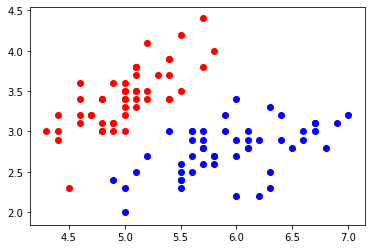

In [29]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

# 数据预处理 标准化

standardScaler = StandardScaler()

standardScaler.fit(X)
X_standard = standardScaler.transform(X)

X[:10], X_standard[:10]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1]]), array([[-0.5810659 ,  0.84183714],
        [-0.89430898, -0.2078351 ],
        [-1.20755205,  0.21203379],
        [-1.36417359,  0.00209934],
        [-0.73768744,  1.05177159],
        [-0.11120129,  1.68157493],
        [-1.36417359,  0.63190269],
        [-0.73768744,  0.63190269],
        [-1.67741667, -0.41776955],
        [-0.89430898,  0.00209934]]))

In [31]:
from sklearn.svm import LinearSVC
#把C设置为很大，也就说惩罚因子很大，那么软间隔就不起作用
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0)

In [32]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape((-1, 1)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape((-1, 1))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap= custom_cmap)

/home/atway/anaconda3/envs/pytorch_yolov3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


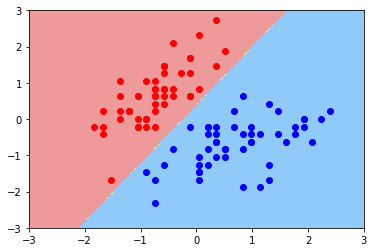

In [33]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color="red")
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color="blue")
plt.show()

In [34]:
#  设置 C 很小是  C=0.01

svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01)

/home/atway/anaconda3/envs/pytorch_yolov3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


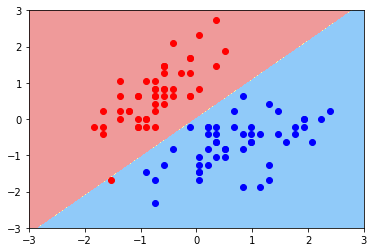

In [35]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color="red")
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color="blue")
plt.show()

In [36]:
svc2.coef_, svc2.intercept_

(array([[ 0.43789736, -0.41091889]]), array([0.00592619]))

In [37]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape((-1, 1)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape((-1, 1))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap= custom_cmap)
    
    # 绘制支持向量
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w[0]*x0 + w[1]*x1 + b = 0
    plot_x0 = np.linspace(axis[0], axis[1], 200)
    
    # w[0]*x0 + w[1]*x1 + b = 1
    plot_x1_up = -w[0]/w[1] * plot_x0 - b/w[1] + 1/w[1]
    
    # w[0]*x0 + w[1]*x1 + b = -1
    plot_x1_down = -w[0]/w[1] * plot_x0 - b/w[1] - 1/w[1]
    
    x0_up_index = (plot_x1_up>axis[2]) & (plot_x1_up<axis[3])
    x0_down_index = (plot_x1_down>axis[2]) & (plot_x1_down<axis[3])
    plt.plot(plot_x0[x0_up_index], plot_x1_up[x0_up_index], color="black")
    plt.plot(plot_x0[x0_down_index], plot_x1_down[x0_down_index], color="black")

/home/atway/anaconda3/envs/pytorch_yolov3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


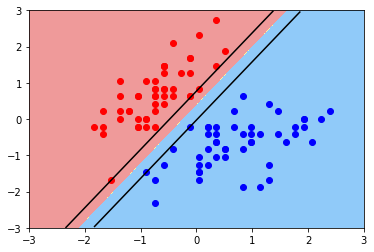

In [38]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color="red")
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color="blue")
plt.show()

/home/atway/anaconda3/envs/pytorch_yolov3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


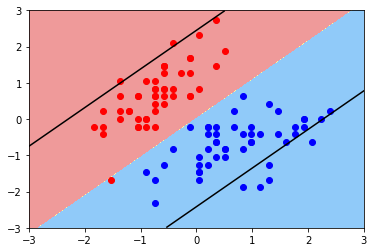

In [39]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color="red")
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color="blue")
plt.show()